## Analysis and visualisation


### Step 1: load packages

In [1]:
#install.packages("dplyr")
#install.packages("ggplot2")
#install.packages("forcats")
library(dplyr)
library(ggplot2)
library(forcats)

Warning message:
"package 'dplyr' was built under R version 4.1.0"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 4.1.0"
Warning message:
"package 'forcats' was built under R version 4.1.1"


### Step 2: loading and preparing the data
**Question:**
What do you think, why are DOIs great for joining metadata on publications?

In [2]:
DF_crossref <- read.csv("../data/crossref_metadata.csv", row.names = "X")
DF_Unpaywall <- read.csv("../data/Unpaywall_metadata.csv", row.names = "X")

DF <- left_join(DF_crossref, DF_Unpaywall, by = "DOIs")

### Step 3: inspecting the data
**Question:** What does *str* tell you about the structure of the data frame?

In [3]:
str(DF)

'data.frame':	51334 obs. of  5 variables:
 $ DOIs            : chr  "10.21203/rs.3.rs-38496/v1" "10.3892/or.2019.7247" "10.1145/2983323.2983807" "10.21203/rs.3.rs-128597/v1" ...
 $ publication_year: int  2020 2019 2016 2020 2021 2021 2016 2019 2018 2020 ...
 $ resource_type   : chr  "posted-content" "journal-article" "proceedings-article" "posted-content" ...
 $ is_oa           : logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ oa_status       : chr  "green" "bronze" "closed" "green" ...


**Question:** Use *table* to look at frequency distribution tables of *publication_year* and *resource_type*. Do you notice any issues with the data we might have to adress before we proceed?

In [4]:
table(DF$publication_year)
table(DF$resource_type)


2015 2016 2017 2018 2019 2020 2021 2022 
5082 6064 7547 8365 8784 9490 6001    1 


               book        book-chapter             dataset     journal-article 
                 46                 463                 242               44994 
      journal-issue           monograph               other         peer-review 
                  3                  16                   5                 209 
     posted-content proceedings-article     reference-entry              report 
                766                4438                 134                  18 

### Step 4: cleaning the data

In [5]:
DF <- filter(DF, publication_year <= 2020)

table(DF$publication_year)


2015 2016 2017 2018 2019 2020 
5082 6064 7547 8365 8784 9490 

In [6]:
DF <- filter(DF, resource_type == "journal-article" | resource_type == "proceedings-article")

table(DF$resource_type)


    journal-article proceedings-article 
              39611                4168 

In [7]:
sum(duplicated(DF$DOIs))

[1] 0

### Step 5: analyse the results
**Question:** How many publications are (not) Open Access?

In [8]:
DF %>%
    count(is_oa) %>%
    mutate(percent = n / sum(n) * 100)

is_oa,n,percent
<lgl>,<int>,<dbl>
FALSE,22519,51.4379
TRUE,21260,48.5621


In [9]:
DF %>%
    group_by(publication_year) %>%
    count(is_oa) %>%
    mutate(percent = n / sum(n) * 100)

publication_year,is_oa,n,percent
<int>,<lgl>,<int>,<dbl>
2015,FALSE,2872,57.61284
2015,TRUE,2113,42.38716
2016,FALSE,3313,57.32826
2016,TRUE,2466,42.67174
2017,FALSE,4108,56.02073
2017,TRUE,3225,43.97927
2018,FALSE,4235,52.15517
2018,TRUE,3885,47.84483
2019,FALSE,4185,49.03914


**Question:** From the results, do you suspect a trend in the data?

In [10]:
lm_not_oa <- DF %>%
    filter(is_oa == FALSE) %>%
    group_by(publication_year) %>%
    count(is_oa)

lm_not_oa <- lm(data = lm_not_oa, formula = n ~ publication_year)

summary(lm_not_oa)$coef

summary(lm_not_oa)$r.squared

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-423553.3,206381.2848,-2.052286,0.1094060
publication_year,211.8,102.2955,2.070472,0.1071728


[1] 0.5173078

**Question:** Repeat the procedure for Open Access publications (setting *"is_oa == TRUE"*) and compare the results. What do you notice?

In [11]:
lm_oa <- DF %>%
    filter(is_oa == TRUE) %>%
    group_by(publication_year) %>%
    count(is_oa)

lm_oa <- lm(data = lm_oa, formula = n ~ publication_year)

summary(lm_oa)$coef

summary(lm_oa)$r.squared

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1256183.7,63238.05516,-19.86436,3.789228e-05
publication_year,624.4,31.34475,19.92040,3.747121e-05


[1] 0.9900205

### Step 6: visualise the results
**Question:** Do you like this plot? Why (not)?

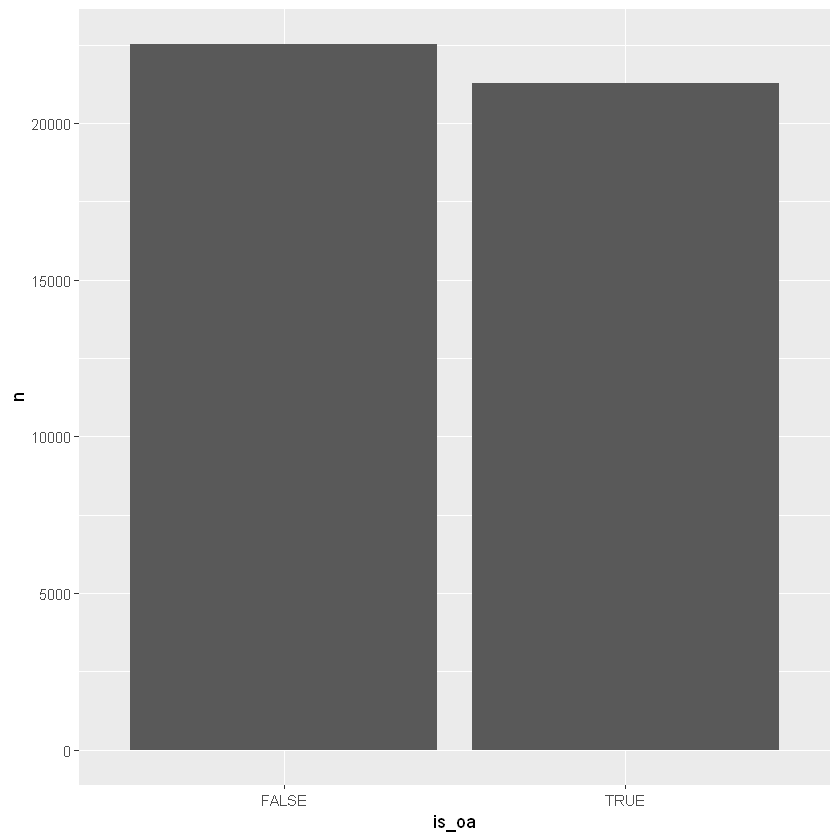

In [12]:
DF %>%
    count(is_oa) %>%
    ggplot(aes(x = is_oa, y = n)) +
    geom_col()

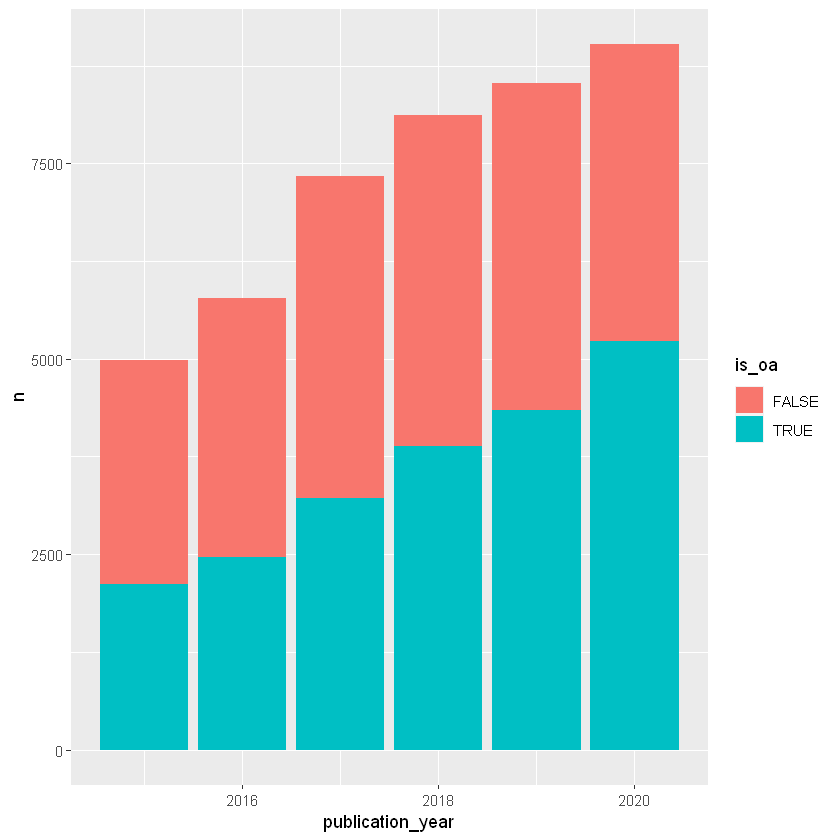

In [13]:
DF %>%
    group_by(publication_year) %>%
    count(is_oa) %>%
    ggplot(aes(x = publication_year, y = n, fill = is_oa)) +
    geom_col()

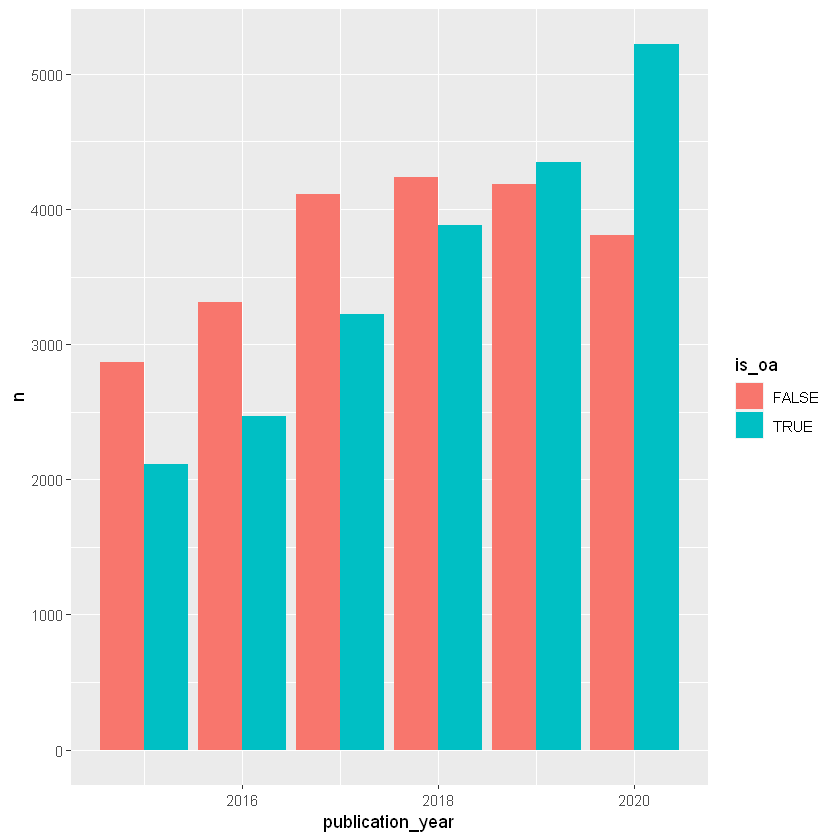

In [14]:
DF %>%
    group_by(publication_year) %>%
    count(is_oa) %>%
    ggplot(aes(x = publication_year, y = n, fill = is_oa)) +
    geom_col(position = "dodge")

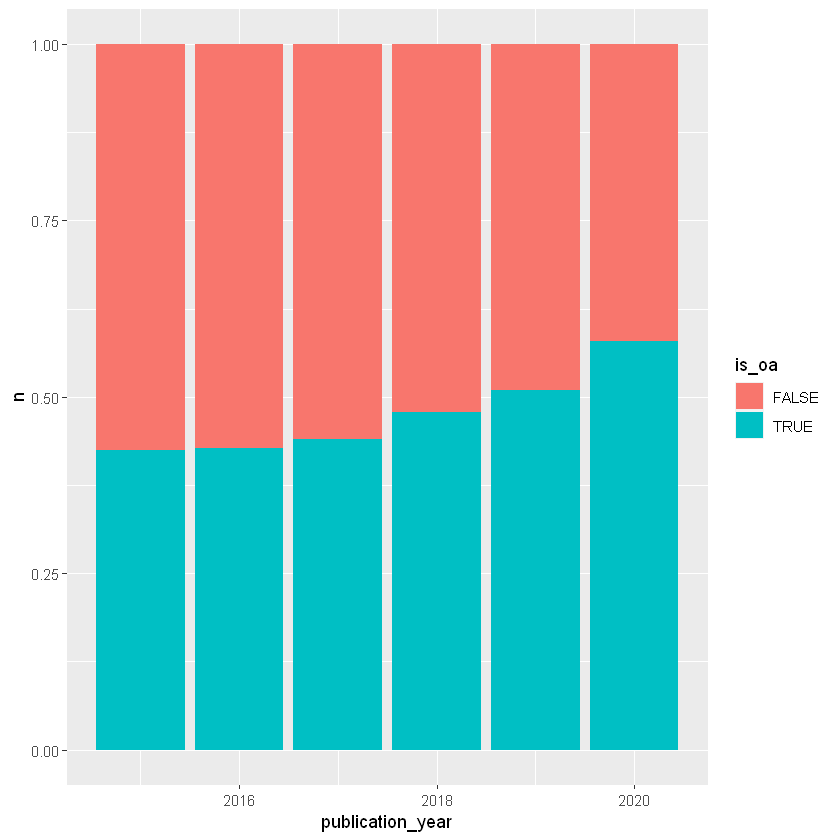

In [15]:
DF %>%
    group_by(publication_year) %>%
    count(is_oa) %>%
    ggplot(aes(x = publication_year, y = n, fill = is_oa)) +
    geom_col(position = "fill")

### Step 7: going beyond...

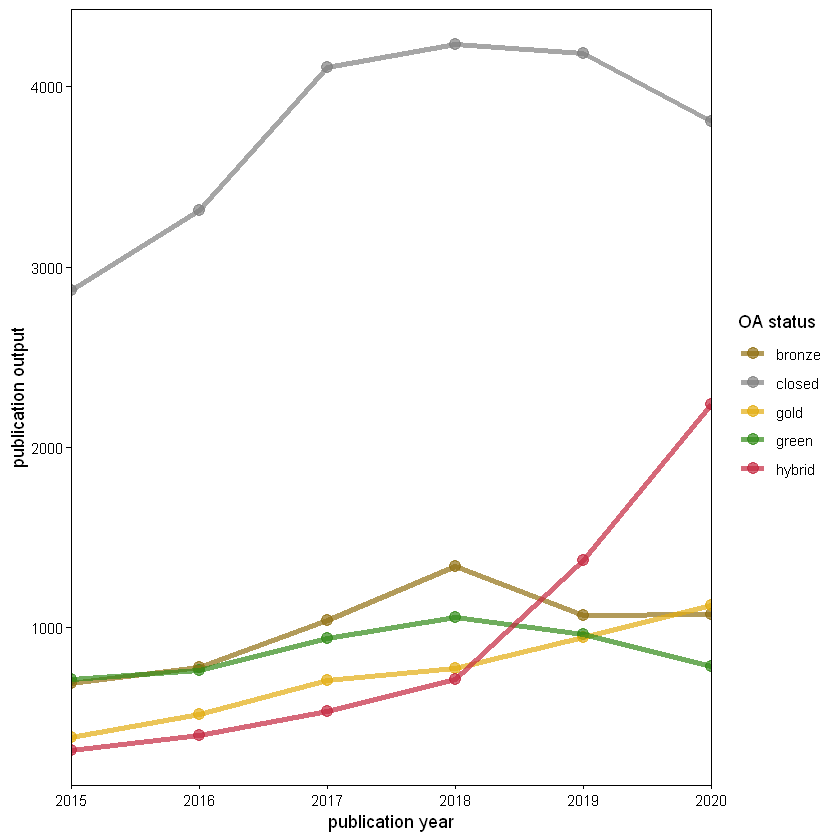

In [16]:
DF %>%
    group_by(publication_year) %>%
    count(oa_status) %>%
    ggplot(aes(x = publication_year, y = n, color = oa_status)) +
    geom_point(size = 3, alpha = 0.7) +
    geom_line(size = 1.5, alpha = 0.7) +
    scale_color_manual(values = c("#917013", "grey50", "#e3ac10", "#308a17", "#c4273f")) +
    scale_x_continuous(expand = c(0,0)) +
    labs(x = "publication year", y = "publication output", color = "OA status") +
    theme_linedraw() +
    theme(panel.grid = element_blank())

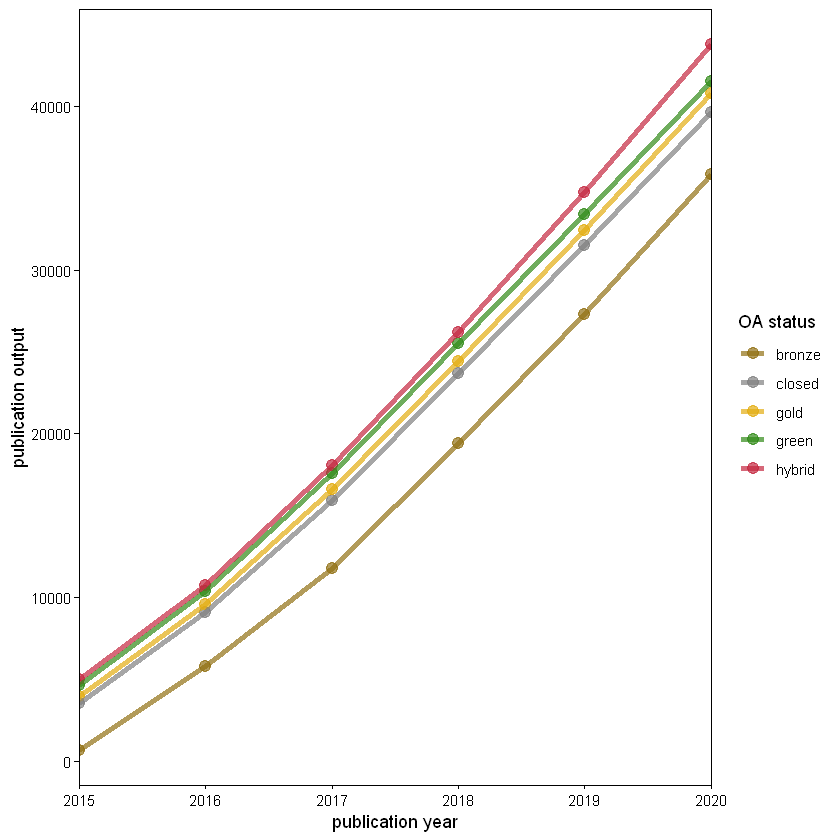

In [17]:
DF %>%
    group_by(publication_year) %>%
    count(oa_status) %>%
    ggplot(aes(x = publication_year, y = cumsum(n), color = oa_status)) +
    geom_point(size = 3, alpha = 0.7) +
    geom_line(size = 1.5, alpha = 0.7) +
    scale_color_manual(values = c("#917013", "grey50", "#e3ac10", "#308a17", "#c4273f")) +
    scale_x_continuous(expand = c(0,0)) +
    labs(x = "publication year", y = "publication output", color = "OA status") +
    theme_linedraw() +
    theme(panel.grid = element_blank())

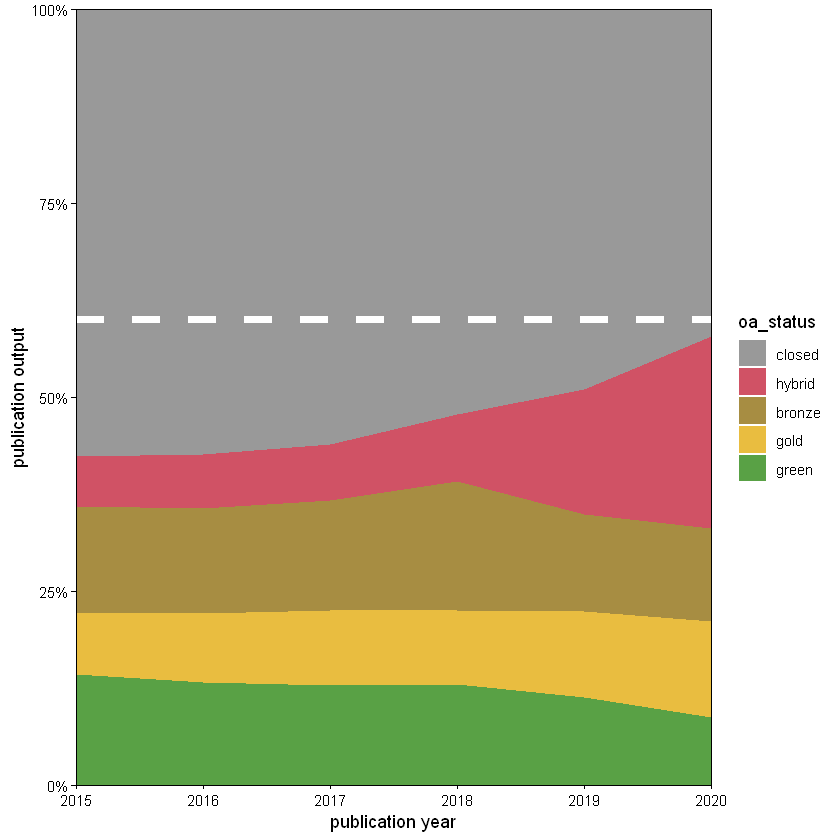

In [18]:
DF %>%
    group_by(publication_year) %>%
    count(oa_status) %>%
    mutate(oa_status = fct_relevel(oa_status, "closed", "hybrid", "bronze", "gold", "green")) %>%
    ggplot(aes(x = publication_year, y = n, fill = oa_status)) +
    geom_area(position = "fill", alpha = 0.8) +
    geom_hline(yintercept = 0.6, linetype = "dashed", color = "white", size = 2) +
    scale_fill_manual(values = c( "grey50", "#c4273f", "#917013", "#e3ac10", "#308a17")) +
    scale_x_continuous(expand = c(0,0)) +
    scale_y_continuous(expand = c(0,0), labels = scales::percent) +
    labs(x = "publication year", y = "publication output", color = "OA status") +
    theme_linedraw() +
    theme(panel.grid = element_blank())

### EXTRA: credit where credit is due

In [19]:
citation("base")
citation("jsonlite")
citation("roadoi")
citation("rcrossref")
citation("dplyr")
citation("ggplot2")
citation("forcats")


To cite R in publications use:

  R Core Team (2021). R: A language and environment for statistical
  computing. R Foundation for Statistical Computing, Vienna, Austria.
  URL https://www.R-project.org/.

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {R: A Language and Environment for Statistical Computing},
    author = {{R Core Team}},
    organization = {R Foundation for Statistical Computing},
    address = {Vienna, Austria},
    year = {2021},
    url = {https://www.R-project.org/},
  }

We have invested a lot of time and effort in creating R, please cite it
when using it for data analysis. See also 'citation("pkgname")' for
citing R packages.



To cite jsonlite in publications use:

  Jeroen Ooms (2014). The jsonlite Package: A Practical and Consistent
  Mapping Between JSON Data and R Objects. arXiv:1403.2805 [stat.CO]
  URL https://arxiv.org/abs/1403.2805.

A BibTeX entry for LaTeX users is

  @Article{,
    title = {The jsonlite Package: A Practical and Consistent Mapping Between JSON Data and R Objects},
    author = {Jeroen Ooms},
    journal = {arXiv:1403.2805 [stat.CO]},
    year = {2014},
    url = {https://arxiv.org/abs/1403.2805},
  }



To cite package 'roadoi' in publications use:

  Najko Jahn (2021). roadoi: Find Free Versions of Scholarly
  Publications via Unpaywall. R package version 0.7.1.
  https://CRAN.R-project.org/package=roadoi

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {roadoi: Find Free Versions of Scholarly Publications via Unpaywall},
    author = {Najko Jahn},
    year = {2021},
    note = {R package version 0.7.1},
    url = {https://CRAN.R-project.org/package=roadoi},
  }



To cite package 'rcrossref' in publications use:

  Scott Chamberlain, Hao Zhu, Najko Jahn, Carl Boettiger and Karthik
  Ram (2020). rcrossref: Client for Various 'CrossRef' 'APIs'. R
  package version 1.1.0. https://CRAN.R-project.org/package=rcrossref

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {rcrossref: Client for Various 'CrossRef' 'APIs'},
    author = {Scott Chamberlain and Hao Zhu and Najko Jahn and Carl Boettiger and Karthik Ram},
    year = {2020},
    note = {R package version 1.1.0},
    url = {https://CRAN.R-project.org/package=rcrossref},
  }



To cite package 'dplyr' in publications use:

  Hadley Wickham, Romain François, Lionel Henry and Kirill Müller
  (2021). dplyr: A Grammar of Data Manipulation. R package version
  1.0.7. https://CRAN.R-project.org/package=dplyr

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {dplyr: A Grammar of Data Manipulation},
    author = {Hadley Wickham and Romain François and Lionel Henry and Kirill Müller},
    year = {2021},
    note = {R package version 1.0.7},
    url = {https://CRAN.R-project.org/package=dplyr},
  }



To cite ggplot2 in publications, please use:

  H. Wickham. ggplot2: Elegant Graphics for Data Analysis.
  Springer-Verlag New York, 2016.

A BibTeX entry for LaTeX users is

  @Book{,
    author = {Hadley Wickham},
    title = {ggplot2: Elegant Graphics for Data Analysis},
    publisher = {Springer-Verlag New York},
    year = {2016},
    isbn = {978-3-319-24277-4},
    url = {https://ggplot2.tidyverse.org},
  }



To cite package 'forcats' in publications use:

  Hadley Wickham (2021). forcats: Tools for Working with Categorical
  Variables (Factors). R package version 0.5.1.
  https://CRAN.R-project.org/package=forcats

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {forcats: Tools for Working with Categorical Variables (Factors)},
    author = {Hadley Wickham},
    year = {2021},
    note = {R package version 0.5.1},
    url = {https://CRAN.R-project.org/package=forcats},
  }
